#### Imports and Libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_log_error,root_mean_squared_error
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
import random
from math import log
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.metrics import sparse_categorical_accuracy,sparse_categorical_crossentropy,CategoricalCrossentropy,CategoricalAccuracy
import tensorflow as tf
from xgboost import XGBClassifier


#### Load CSV

In [36]:
df = pd.read_csv("D:\\dataset\\playground-series-s4e6\\train.csv")

#### Data Exploration


In [37]:
df

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


#### Check for Null data

In [38]:
df.isna().any()

id                                                False
Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance                        False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                         

In [39]:
for i in df.columns:
    print(i,':',df[i].unique(),'\n')

id : [    0     1     2 ... 76515 76516 76517] 

Marital status : [1 2 4 3 5 6] 

Application mode : [ 1 17 39 44  7 18 15 16 53 43 51 42 10  5 12 27  2 26  4 35  9  3] 

Application order : [1 2 3 6 4 5 0 9] 

Course : [9238 9254 9500  171 9085 9773 9003 9853 9147 9670 8014 9119 9991 9130
 9556 9070   33  979   39] 

Daytime/evening attendance : [1 0] 

Previous qualification : [ 1 19 39 40 12  3  2 42  4  9 11  6 15 38 10 43 14 37  5 36 17] 

Previous qualification (grade) : [126.  125.  137.  131.  132.  133.1 130.  135.  120.  140.  154.  133.
 151.  122.  138.  145.  139.  110.  114.  129.  128.  150.  143.  117.
 161.  121.  141.  147.  134.  113.  160.  100.  136.  168.  108.  124.
 155.  118.  149.  156.  116.  115.  123.  142.  127.  146.  144.  109.
 152.  111.  175.  148.  107.  170.  119.  153.  180.  157.  158.  102.
 166.  106.  105.  162.  163.  118.9  95.  112.  176.  159.  119.1 126.6
 139.3  96.  101.  177.  140.8 172.  164.   99.  167.  169.  188.  165.
 173.  103.  

In [40]:
df.dtypes

id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u

In [41]:
len(df.columns)

38

#### Drop Columns based on Correlation

In [42]:
dfcor = df

In [43]:
dfcor['Target'] = pd.Categorical(dfcor['Target']).codes

In [44]:
cor = dfcor.corr()['Target']

In [45]:
cor

id                                                0.001411
Marital status                                   -0.123093
Application mode                                 -0.324830
Application order                                 0.128394
Course                                            0.154208
Daytime/evening attendance                        0.124484
Previous qualification                           -0.092319
Previous qualification (grade)                    0.138119
Nacionality                                      -0.004722
Mother's qualification                           -0.085056
Father's qualification                           -0.012449
Mother's occupation                              -0.043157
Father's occupation                              -0.032646
Admission grade                                   0.172880
Displaced                                         0.150066
Educational special needs                        -0.000499
Debtor                                           -0.2483

##### Drop features that have a correlation of above 0.1 and below -0.1

In [46]:
drop_cols = []
for i in cor.index:
    if(cor[i] < 0.1 and cor[i] > -0.1):
        drop_cols.append(i)

In [47]:
dfDrop = df.drop(columns=drop_cols)

PreProcess data

In [48]:
x = dfDrop.drop(columns=['Target'])
Y = dfDrop['Target']

In [49]:
scaler = MinMaxScaler()

In [50]:
x[x.columns] = scaler.fit_transform(x[x.columns])

#### Perform PCA maintaining 95% variance

In [51]:
pca = PCA()
pca.fit(x)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

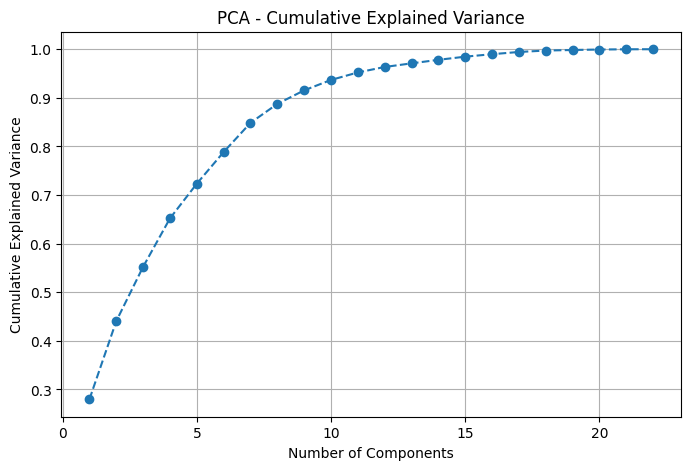

In [52]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [53]:
# Determine number of components to retain 95% variance
num_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {num_components_95}")

Number of components to retain 95% variance: 11


In [54]:
# Transform data using the determined number of components
pca = PCA(n_components=num_components_95)
reduced_data = pca.fit_transform(x)

#### Convert target to categorical

In [55]:
Ycat = pd.Categorical(Y).codes

In [56]:
Ycat

array([2, 0, 0, ..., 1, 0, 2], dtype=int8)

#### One Hot Encoding

In [57]:
Y_OHE = pd.get_dummies(Y)

In [58]:
Y_OHE

,0,1,2
0,0,0,1
1,1,0,0
2,1,0,0
3,0,1,0
4,0,0,1
...,...,...,...
76513,0,0,1
76514,0,0,1
76515,0,1,0
76516,1,0,0


In [59]:
x_traincat,x_testcat,y_traincat,y_testcat = train_test_split(x,Ycat,test_size=0.1,random_state=32)

In [60]:
x_trainOHE,x_testOHE,y_trainOHE,y_testOHE = train_test_split(x,Y_OHE,test_size=0.1,random_state=32)

#### SVM


In [61]:
smodel = SVC()

In [62]:
smodel.fit(x_testcat,y_testcat)

SVC()

In [63]:
y_pred = smodel.predict(x_testcat)

In [64]:
accuracy_score(y_testcat,y_pred)

0.8142969158389963

#### XGB Classifier

In [65]:
xmodel = XGBClassifier(objective='multi:softprob',num_class=3)
xmodel.fit(x_traincat,y_traincat)
y_pred = xmodel.predict(x_testcat)

In [66]:
accuracy_score(y_testcat,y_pred)

0.8281495033978045

#### Artifical Neural Networks

In [67]:
NN = Sequential()
NN.add(Dense(22, activation='relu',input_shape=(22,)))
#NN.add(Dropout(0.5))
#NN.add(Dense(25, activation='relu'))
#NN.add(Dropout(0.5))
NN.add(Dense(15,activation='relu'))
#NN.add(Dropout(0.5))
NN.add(Dense(8,activation='relu'))
#NN.add(Dropout(0.5))
NN.add(Dense(3,activation='softmax'))

c:\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
NN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [69]:
NN.fit(x_trainOHE,y_trainOHE, epochs=25, batch_size=1000)

Epoch 1/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4858 - loss: 1.0389
Epoch 2/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7264 - loss: 0.7060
Epoch 3/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7743 - loss: 0.5672
Epoch 4/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8003 - loss: 0.5162
Epoch 5/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8115 - loss: 0.4930
Epoch 6/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8108 - loss: 0.4935
Epoch 7/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8142 - loss: 0.4865
Epoch 8/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8155 - loss: 0.4845
Epoch 9/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8123 - loss: 0.4871
Epoch 10/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8146 - loss: 0.4829
Epoch 11/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8165 - loss: 0.4775
Epoch 12/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8163 - lo

In [71]:
x_trainOHE.shape

(68866, 22)

In [72]:
y_pred = NN.predict(x_testOHE)

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [73]:
y_pred.shape

(7652, 3)

In [74]:
y_predT = np.argmax(y_pred,axis=1)

In [78]:
accuracy_score(y_testcat,y_predT)

0.8156037637219028

### Submission data
##### Data Preprocessing


In [80]:
Testdf = pd.read_csv("D:\\dataset\\playground-series-s4e6\\test.csv")
id = Testdf['id']
Testdf.drop(columns=drop_cols,inplace=True)
Testdf[Testdf.columns] = scaler.fit_transform(Testdf[Testdf.columns])
pca = PCA(n_components=num_components_95)
reduced_dataT = pca.fit_transform(Testdf)

In [82]:
y_pred = smodel.predict(Testdf)

In [83]:
y_predNN = NN.predict(Testdf)

1595/1595 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


In [84]:
y_predX = xmodel.predict(Testdf)